# Ensemble Learning and Random Forests

## Voting Classifiers

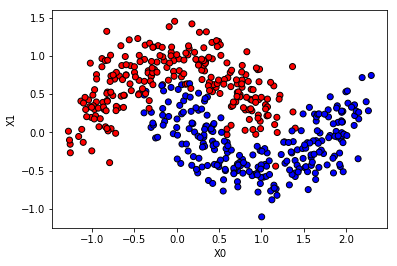

In [1]:
from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

make_moons = datasets.make_moons(n_samples=500, noise=0.20, random_state=0)
X, y = make_moons

import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('X0')
plt.ylabel('X1')
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:,0], X[:,1],c=y, cmap=cm_bright,
               edgecolors='k')


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard' # soft is better in most situations
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [4]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_pred, y_test))

LogisticRegression 0.853333333333
RandomForestClassifier 0.96
SVC 0.946666666667
VotingClassifier 0.946666666667


## Bagging and Pasting

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1
    )

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.95999999999999996

In [6]:
bag_clf1 = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True
    )
bag_clf1.fit(X_train, y_train)
bag_clf1.oob_score_

0.95714285714285718

In [7]:
y_pred = bag_clf1.predict(X_test)
accuracy_score(y_pred, y_test)

0.95999999999999996

In [8]:
bag_clf1.oob_decision_function_

array([[ 0.21153846,  0.78846154],
       [ 0.00527704,  0.99472296],
       [ 0.00260417,  0.99739583],
       [ 0.90571429,  0.09428571],
       [ 1.        ,  0.        ],
       [ 0.19794344,  0.80205656],
       [ 0.1027027 ,  0.8972973 ],
       [ 0.02583979,  0.97416021],
       [ 0.99736148,  0.00263852],
       [ 1.        ,  0.        ],
       [ 0.00530504,  0.99469496],
       [ 0.00546448,  0.99453552],
       [ 0.00806452,  0.99193548],
       [ 0.96410256,  0.03589744],
       [ 0.9048913 ,  0.0951087 ],
       [ 0.85254692,  0.14745308],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.09264305,  0.90735695],
       [ 0.6741573 ,  0.3258427 ],
       [ 0.0080429 ,  0.9919571 ],
       [ 0.8913649 ,  0.1086351 ],
       [ 0.70108696,  0.29891304],
       [ 0.0839895 ,  0.9160105 ],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 0.92592593,  0.07407407],
       [ 0.88378378,  0.11621622],
       [ 0.92950392,

In [9]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

## Random Patches and Random Subspaces

### max_samples & bootstrap
1. Sampling both training instances and features is called Random Patches
2. bootstrap=False, max_samples=1.0 means Keep all training instances
3. bootstrap=True, max_samples is smaller than 1.0 means Sampling features (Random subspace)

## Random Forests

In [10]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
y_pred_rf

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [11]:
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
        n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
    )

## Feature Importance

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0994370161918
sepal width (cm) 0.0232354202763
petal length (cm) 0.434435680712
petal width (cm) 0.44289188282


## AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1), n_estimators=200,
        algorithm="SAMME.R", learning_rate=0.5
    )
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [14]:
ada_clf.predict(X_test)

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Gradient Boosting

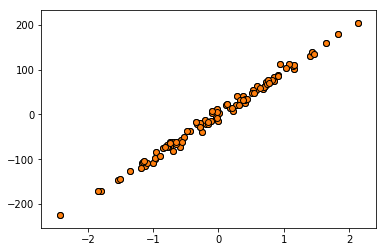

In [106]:
from sklearn.datasets import make_regression

random_reg = make_regression(n_samples=100, n_features=1, n_informative=10,
                             n_targets=1, bias=0.2, effective_rank=None, 
                             tail_strength=0.5, noise=8, 
                             shuffle=True, coef=False, random_state=None)
plt.scatter(random_reg[0], random_reg[1], cmap=cm_bright,
               edgecolors='k')
#X1 = []
#X2 = []
#for x in random_reg[0]:
#    X1.append(x[0])
#    X2.append(x[1])

X_train, X_val, y_train, y_val = train_test_split(random_reg[0], random_reg[1], 
                                                    test_size=0.3, random_state=1)
plt.scatter(random_reg[0], random_reg[1], cmap=cm_bright,
               edgecolors='k')

In [107]:
# This import registers the 3D projection, but is otherwise unused.
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

#import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter
#import numpy as np

#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(X1, X2, random_reg[1])
#plt.show()

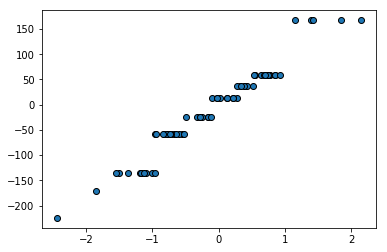

In [108]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X_train, y_train)

y2 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X_train, y2)

y3 = y2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X_train, y3)

y_pred = sum(tree.predict(X_train) for tree in (tree_reg1, tree_reg2, tree_reg3))

plt.scatter(X_train, y_pred, cmap=cm_bright,
               edgecolors='k')

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [112]:
import numpy as np
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
        for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=63, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [113]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping